# Project 2 Plan 

Goal: predict if the a persons income exceeds 50k with >80% accuracy

Preprocessing
* fill null and ambigous values 
* convert catagorical features to continous features

Exploratory Data Analysis
* vizualize distribution (histogram, pair plots)
* PCA decomposition

Classification Algorithms
* $k$-Nearest Neighbors
* Decision Trees 
* Random Forrest
* Support Vector Machines

Optimization and Parameter Tuning
* $k$-Nearest Neighbors: optimize k & weight
* Decision Trees & Random Forest: optimize max depth
* Support Vector Machines: opt(penalty c) with linear and poly kernels

Model Analysis
* multiple cross validations splits
* compare classifiers with accuracy
* target accuracy 80% > 
    - use of the model will depend

# UCI Census Dataset

The dataset is a dataset extracted by Barry Becker from the 1994 Census database. The census bureau database can found at http://www.census.gov/ftp/pub/DES/www/welcome.html.

Target:
* `class-probability`: >50K, <=50K

Features:
* `age`: continuous.
* `workclass`: Private, Self-emp-not-inc, Self-emp-inc, Federal-gov, Local-gov, State-gov, Without-pay, Never-worked.
* `fnlwgt`: continuous.
* `education`: Bachelors, Some-college, 11th, HS-grad, Prof-school, Assoc-acdm, Assoc-voc, 9th, 7th-8th, 12th, Masters, 1st-4th, 10th, Doctorate, 5th-6th, Preschool.
* `education-num`: continuous.
* `marital-status`: Married-civ-spouse, Divorced, Never-married, Separated, Widowed, Married-spouse-absent, Married-AF-spouse.
* `occupation`: Tech-support, Craft-repair, Other-service, Sales, Exec-managerial, Prof-specialty, Handlers-cleaners, Machine-op-inspct, Adm-clerical, Farming-fishing, Transport-moving, Priv-house-serv, Protective-serv, Armed-Forces.
* `relationship`: Wife, Own-child, Husband, Not-in-family, Other-relative, Unmarried.
* `race`: White, Asian-Pac-Islander, Amer-Indian-Eskimo, Other, Black.
* `sex`: Female, Male.
* `capital-gain`: continuous.
* `capital-loss`: continuous.
* `hours-per-week`: continuous.
* `native-country`: United-States, Cambodia, England, Puerto-Rico, Canada, Germany, Outlying-US(Guam-USVI-etc), India, Japan, Greece, South, China, Cuba, Iran, Honduras, Philippines, Italy, Poland, Jamaica, Vietnam, Mexico, Portugal, Ireland, France, Dominican-Republic, Laos, Ecuador, Taiwan, Haiti, Columbia, Hungary, Guatemala, Nicaragua, Scotland, Thailand, Yugoslavia, El-Salvador, Trinadad&Tobago, Peru, Hong, Holand-Netherlands.

# Preprocessing

First the data needs to be loaded and cleaned.

In [48]:
import pandas as pd
import numpy as np

# features: names[:-1] and target: names[-1]
names = ["age", "workclass", "fnlwgt", "education", "education-num", "marital-status",
         "occupation", "relationship", "race", "sex", "capital-gain", "capital-loss", 
         "hours-per-week", "native-country", "class-probability"]

# load data from url into a dataframe
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.data"
df = pd.read_csv(url, names=names)
df.head()

age          workclass  fnlwgt   education  education-num  \
0   39          State-gov   77516   Bachelors             13   
1   50   Self-emp-not-inc   83311   Bachelors             13   
2   38            Private  215646     HS-grad              9   
3   53            Private  234721        11th              7   
4   28            Private  338409   Bachelors             13   

        marital-status          occupation    relationship    race      sex  \
0        Never-married        Adm-clerical   Not-in-family   White     Male   
1   Married-civ-spouse     Exec-managerial         Husband   White     Male   
2             Divorced   Handlers-cleaners   Not-in-family   White     Male   
3   Married-civ-spouse   Handlers-cleaners         Husband   Black     Male   
4   Married-civ-spouse      Prof-specialty            Wife   Black   Female   

   capital-gain  capital-loss  hours-per-week  native-country  \
0          2174             0              40   United-States   
1             0             0              13   United-States   
2             0             0              40   United-States   
3             0             0              40   United-States   
4             0             0              40            Cuba   

  class-probability  
0             <=50K  
1             <=50K  
2             <=50K  
3             <=50K  
4             <=50K

It is important to look at the distribution of the data. Some features may not have a normal distribution therefore, skewing the entire model or may have no importance to the target.

Since the dataset is a mix of continous and catagorical features, histograms and bar charts will vizualize the distribution. First let's look at the continous features with a histogram.

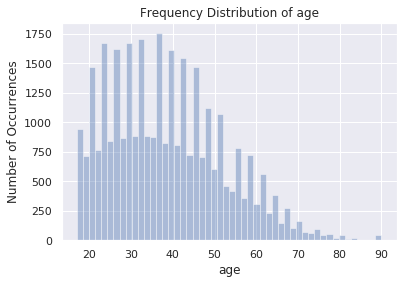

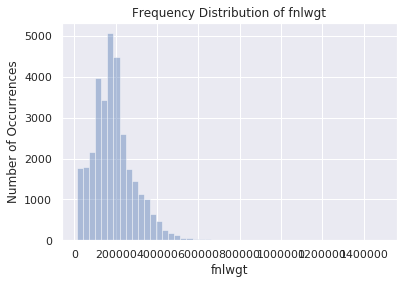

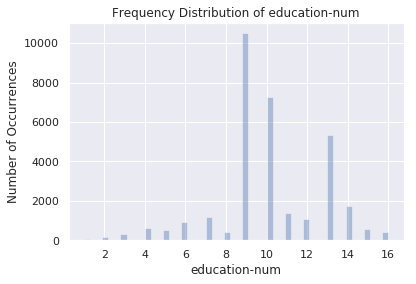

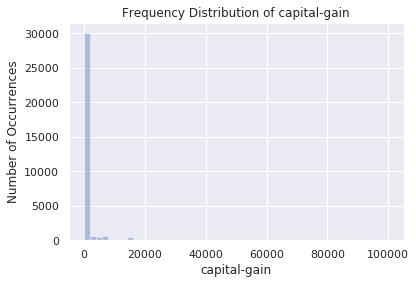

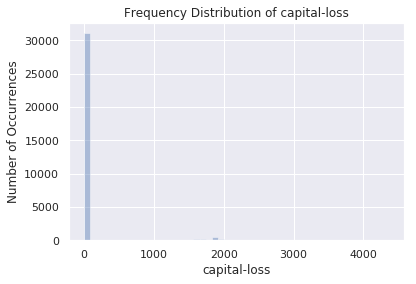

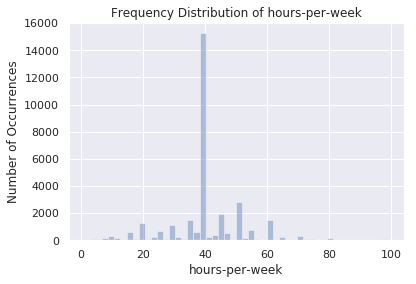

In [49]:
%matplotlib inline
import seaborn as sns
import matplotlib.pyplot as plt

# continous features
con_names = [names[0]] + [names[2]] + [names[4]] + names[10:13]

for name in con_names:
    
    # plot distribution with a histogram
    values = [val for val in df[name].values]
    sns.distplot(values, kde=False)
    plt.title('Frequency Distribution of ' + name)
    plt.ylabel('Number of Occurrences', fontsize=12)
    plt.xlabel(name , fontsize=12)
    plt.show()

Some features like capital gain and capital loss do not have a normal distribution. There are plently of 0's for both features with little to no non-zero values. There may be many reasons for this distribution. The missing values may have been encoded as 0's when collecting the data or the feature are not that important to most instances of the dataset. Just to be cautions we should keep these features in the dataset.

Now we can look at the distribution of catagorical features using a bar chart.

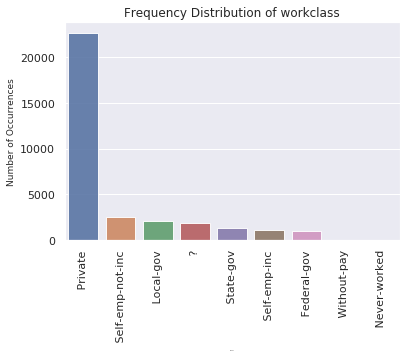

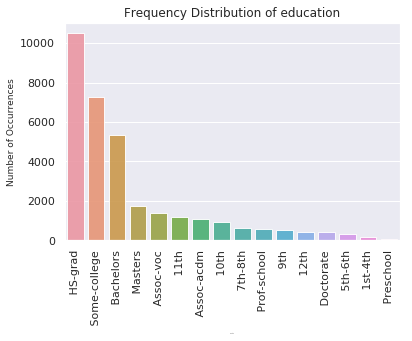

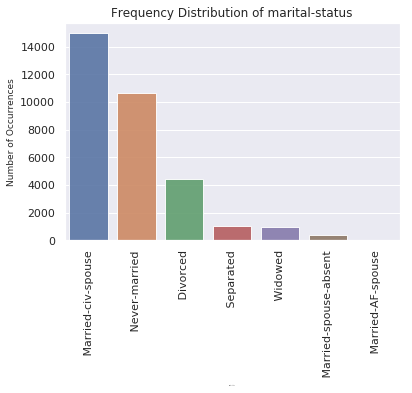

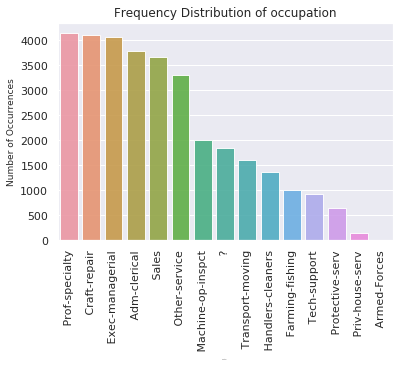

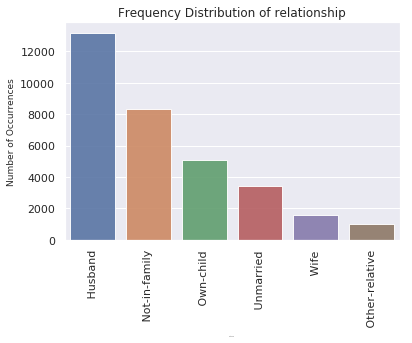

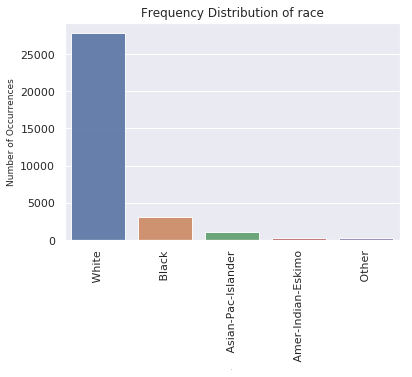

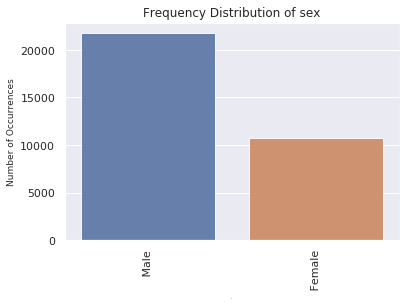

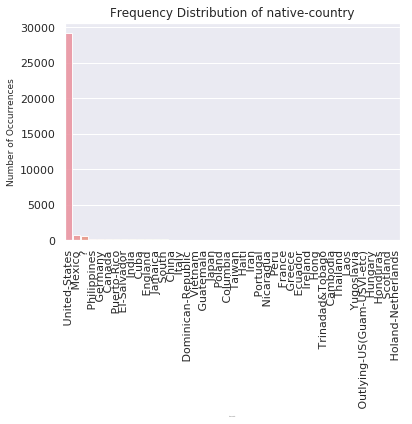

In [50]:
# catagorical features
cat_names = [names[1]] + [names[3]] + names[5:10] + [names[13]]

for name in cat_names:
    # plot distribution with a bar chart
    count = df[name].value_counts()
    sns.set(style="darkgrid")
    sns.barplot(count.index, count.values, alpha=0.9)
    plt.title('Frequency Distribution of ' + name)
    plt.xticks(rotation='vertical')
    plt.xlabel(name, fontsize=1)
    plt.ylabel('Number of Occurrences', fontsize=9)
    plt.show()

Many of the catgorical features are heavly skewed. We will keep these features for the same reason the continous features were kept they may be important.

We will now check for null values in the data set. PCA and ML algorithms won't be able to take null values.

In [51]:
# number of missing values in the entire dataframe
print("number of missing values: ", df.isnull().values.sum())

# the column-wise distribution of missing values
print(df.isnull().sum())

number of missing values:  0
age                  0
workclass            0
fnlwgt               0
education            0
education-num        0
marital-status       0
occupation           0
relationship         0
race                 0
sex                  0
capital-gain         0
capital-loss         0
hours-per-week       0
native-country       0
class-probability    0
dtype: int64


There are no null values in the dataset however that does not mean there may exist some ambigous values. The collectors of the dataset encoded ambigous values as '?'.

In [52]:
print(df["workclass"].value_counts())

 Private             22696
 Self-emp-not-inc     2541
 Local-gov            2093
 ?                    1836
 State-gov            1298
 Self-emp-inc         1116
 Federal-gov           960
 Without-pay            14
 Never-worked            7
Name: workclass, dtype: int64


Instead of replacing or deleting the ambigous values we will just use One Hot Encoding on them.

We should check for any duplicate values in the dataset. There is a python package called Levenshtein that can calculate the Levenshtein distance and ratio from two strings. We will use this package to find any similar values.

First we will have to install the package using the pip installer.

In [53]:
import os

# install module
command = "pip install python-Levenshtein"
os.system(command)

0

In [54]:
import Levenshtein as lev

# loop through all features
for i in range(len(names)):
    for j in range(i+1, len(names)):

        # compute a Levenshtein ratio and distance
        distance = lev.distance(names[i].lower(), names[j].lower()),
        ratio = lev.ratio(names[i].lower(), names[j].lower())
        
        # if the as
        if distance[0] < 4 or ratio > 0.75:
            print(i, names[i], j, names[j])

0 age 8 race
0 age 9 sex
3 education 4 education-num


There appears to be no similar values in the data set.

We can now use convert the catagorical features to continous values. Pandas has a method that uses One Hot Encoding. Each feature will be converted to all the possible values. Each feature will either have a 0 or 1.

In [55]:
# catagorical features
cat_names = [names[1]] + [names[3]] + names[5:10] + [names[13]] + [names[-1]]
print(cat_names)

for name in cat_names:

    # convert catagorical features
    one_hot = pd.get_dummies(df[name])
    
    # join converted feature to dataframe
    df = df.join(one_hot, rsuffix=name)

# drop catagorical names
df = df.drop(cat_names, axis=1)

# store updated names
names = df.columns

['workclass', 'education', 'marital-status', 'occupation', 'relationship', 'race', 'sex', 'native-country', 'class-probability']


In [56]:
df.head()

age  fnlwgt  education-num  capital-gain  capital-loss  hours-per-week   ?  \
0   39   77516             13          2174             0              40   0   
1   50   83311             13             0             0              13   0   
2   38  215646              9             0             0              40   0   
3   53  234721              7             0             0              40   0   
4   28  338409             13             0             0              40   0   

    Federal-gov   Local-gov   Never-worked  ...   Scotland   South   Taiwan  \
0             0           0              0  ...          0       0        0   
1             0           0              0  ...          0       0        0   
2             0           0              0  ...          0       0        0   
3             0           0              0  ...          0       0        0   
4             0           0              0  ...          0       0        0   

    Thailand   Trinadad&Tobago   United-States   Vietnam   Yugoslavia   <=50K  \
0          0                 0               1         0            0       1   
1          0                 0               1         0            0       1   
2          0                 0               1         0            0       1   
3          0                 0               1         0            0       1   
4          0                 0               0         0            0       1   

    >50K  
0      0  
1      0  
2      0  
3      0  
4      0  

[5 rows x 110 columns]

# Exploratory Data Analysis

Let's look at some summary statistics of the dataset.

In [57]:
df.describe()

age        fnlwgt  education-num  capital-gain  capital-loss  \
count  32561.000000  3.256100e+04   32561.000000  32561.000000  32561.000000   
mean      38.581647  1.897784e+05      10.080679   1077.648844     87.303830   
std       13.640433  1.055500e+05       2.572720   7385.292085    402.960219   
min       17.000000  1.228500e+04       1.000000      0.000000      0.000000   
25%       28.000000  1.178270e+05       9.000000      0.000000      0.000000   
50%       37.000000  1.783560e+05      10.000000      0.000000      0.000000   
75%       48.000000  2.370510e+05      12.000000      0.000000      0.000000   
max       90.000000  1.484705e+06      16.000000  99999.000000   4356.000000   

       hours-per-week             ?   Federal-gov     Local-gov  \
count    32561.000000  32561.000000  32561.000000  32561.000000   
mean        40.437456      0.056386      0.029483      0.064279   
std         12.347429      0.230670      0.169159      0.245254   
min          1.000000      0.000000      0.000000      0.000000   
25%         40.000000      0.000000      0.000000      0.000000   
50%         40.000000      0.000000      0.000000      0.000000   
75%         45.000000      0.000000      0.000000      0.000000   
max         99.000000      1.000000      1.000000      1.000000   

        Never-worked  ...      Scotland         South        Taiwan  \
count   32561.000000  ...  32561.000000  32561.000000  32561.000000   
mean        0.000215  ...      0.000369      0.002457      0.001566   
std         0.014661  ...      0.019194      0.049507      0.039546   
min         0.000000  ...      0.000000      0.000000      0.000000   
25%         0.000000  ...      0.000000      0.000000      0.000000   
50%         0.000000  ...      0.000000      0.000000      0.000000   
75%         0.000000  ...      0.000000      0.000000      0.000000   
max         1.000000  ...      1.000000      1.000000      1.000000   

           Thailand   Trinadad&Tobago   United-States       Vietnam  \
count  32561.000000      32561.000000    32561.000000  32561.000000   
mean       0.000553          0.000584        0.895857      0.002058   
std        0.023506          0.024149        0.305451      0.045316   
min        0.000000          0.000000        0.000000      0.000000   
25%        0.000000          0.000000        1.000000      0.000000   
50%        0.000000          0.000000        1.000000      0.000000   
75%        0.000000          0.000000        1.000000      0.000000   
max        1.000000          1.000000        1.000000      1.000000   

         Yugoslavia         <=50K          >50K  
count  32561.000000  32561.000000  32561.000000  
mean       0.000491      0.759190      0.240810  
std        0.022162      0.427581      0.427581  
min        0.000000      0.000000      0.000000  
25%        0.000000      1.000000      0.000000  
50%        0.000000      1.000000      0.000000  
75%        0.000000      1.000000      0.000000  
max        1.000000      1.000000      1.000000  

[8 rows x 110 columns]

Inital obervations of the data show that the data is not normalized. Normalization is when a features means for each feature are close to 0 and the stds for each feature are not close to 1.

By scaling the means to 0 and stds to 1 the easier it will be to reduce dimensions with PCA. 

In [58]:
from sklearn.preprocessing import StandardScaler

# seperate feature names and taget names
# drop the redundent target ">50K"
features = names[:-2]
target = names[-2]

# seperate the feature and target values
X = df.loc[:, features].values
y = df.loc[:, target].values

# standardize the features
scaler = StandardScaler()
scaler.fit(X)
X = scaler.transform(X)

# Create a standardized pandas dataframe
df = pd.DataFrame(data = X, columns = features)
df.describe()

age        fnlwgt  education-num  capital-gain  capital-loss  \
count  3.256100e+04  3.256100e+04   3.256100e+04  3.256100e+04  3.256100e+04   
mean  -1.737807e-16 -8.840254e-17   2.312098e-17 -1.726862e-16  1.832920e-16   
std    1.000015e+00  1.000015e+00   1.000015e+00  1.000015e+00  1.000015e+00   
min   -1.582206e+00 -1.681631e+00  -3.529656e+00 -1.459205e-01 -2.166595e-01   
25%   -7.757679e-01 -6.816910e-01  -4.200596e-01 -1.459205e-01 -2.166595e-01   
50%   -1.159546e-01 -1.082193e-01  -3.136003e-02 -1.459205e-01 -2.166595e-01   
75%    6.904838e-01  4.478765e-01   7.460392e-01 -1.459205e-01 -2.166595e-01   
max    3.769612e+00  1.226856e+01   2.300838e+00  1.339458e+01  1.059351e+01   

       hours-per-week             ?   Federal-gov     Local-gov  \
count    3.256100e+04  3.256100e+04  3.256100e+04  3.256100e+04   
mean     5.995645e-16  1.374779e-17  6.294747e-16 -7.861474e-16   
std      1.000015e+00  1.000015e+00  1.000015e+00  1.000015e+00   
min     -3.194030e+00 -2.444502e-01 -1.742951e-01 -2.620974e-01   
25%     -3.542945e-02 -2.444502e-01 -1.742951e-01 -2.620974e-01   
50%     -3.542945e-02 -2.444502e-01 -1.742951e-01 -2.620974e-01   
75%      3.695194e-01 -2.444502e-01 -1.742951e-01 -2.620974e-01   
max      4.742967e+00  4.090813e+00  5.737396e+00  3.815376e+00   

        Never-worked  ...      Portugal   Puerto-Rico      Scotland  \
count   3.256100e+04  ...  3.256100e+04  3.256100e+04  3.256100e+04   
mean   -7.289472e-16  ...  6.362374e-16 -1.833996e-15 -8.044147e-16   
std     1.000015e+00  ...  1.000015e+00  1.000015e+00  1.000015e+00   
min    -1.466381e-02  ... -3.372864e-02 -5.927412e-02 -1.920091e-02   
25%    -1.466381e-02  ... -3.372864e-02 -5.927412e-02 -1.920091e-02   
50%    -1.466381e-02  ... -3.372864e-02 -5.927412e-02 -1.920091e-02   
75%    -1.466381e-02  ... -3.372864e-02 -5.927412e-02 -1.920091e-02   
max     6.819510e+01  ...  2.964839e+01  1.687077e+01  5.208087e+01   

              South        Taiwan      Thailand   Trinadad&Tobago  \
count  3.256100e+04  3.256100e+04  3.256100e+04      3.256100e+04   
mean  -2.670340e-15 -5.892619e-16 -8.950892e-16      2.531101e-15   
std    1.000015e+00  1.000015e+00  1.000015e+00      1.000015e+00   
min   -4.962840e-02 -3.960742e-02 -2.351838e-02     -2.416321e-02   
25%   -4.962840e-02 -3.960742e-02 -2.351838e-02     -2.416321e-02   
50%   -4.962840e-02 -3.960742e-02 -2.351838e-02     -2.416321e-02   
75%   -4.962840e-02 -3.960742e-02 -2.351838e-02     -2.416321e-02   
max    2.014975e+01  2.524779e+01  4.251993e+01      4.138522e+01   

        United-States       Vietnam    Yugoslavia  
count    3.256100e+04  3.256100e+04  3.256100e+04  
mean     1.214828e-15  7.960858e-17  4.459549e-16  
std      1.000015e+00  1.000015e+00  1.000015e+00  
min     -2.932948e+00 -4.540836e-02 -2.217266e-02  
25%      3.409539e-01 -4.540836e-02 -2.217266e-02  
50%      3.409539e-01 -4.540836e-02 -2.217266e-02  
75%      3.409539e-01 -4.540836e-02 -2.217266e-02  
max      3.409539e-01  2.202238e+01  4.510058e+01  

[8 rows x 108 columns]

Now that the dataframe is normilized we will perform PCA on the dataset inorder to reduce the number of primary components. With less primary compenents the faster the training and testing will run the more information will be lost.

In [59]:
from sklearn.decomposition import PCA
import numpy as np

# stores dataframes, headers, and sum variance
dfs = []
headers = []
sum_variance = []

# store original dataframe
og_df = df

# testing dimensional range 2-108
dims = range(2, len(features))

# loop through dimensions
for d in dims:
    
    # create pca object of d-dimensions
    pca = PCA(n_components=d)

    # fit X and reduce dimensions
    principal_components = pca.fit_transform(X)

    # store sum variance
    variance = pca.explained_variance_[:]
    sum_variance.append(np.sum(variance))

    # create and store header
    header = [('principle component ' + str(i)) for i in range(1, d+1)]
    headers.append(header)

    # create and store dataframe
    df = pd.DataFrame(data = np.c_[principal_components, y], columns = header +['<=50K'])
    dfs.append(df)

We will graph the sum variance of each primary component reduction. This graph will help us get a better sense of how much data is being lost with each reduction. 

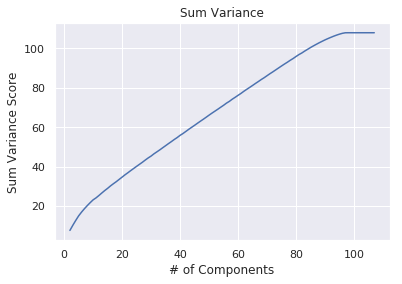

In [60]:
# plot variance
plt.figure()
plt.title('Sum Variance')
plt.xlabel('# of Components')
plt.ylabel('Sum Variance Score')
plt.plot(dims, sum_variance)
plt.show()

The graph how variance is lost with each component reduction. At from 96 components to 103 components there appears to be a no change in variance. We will be testing our classifiers with 96 components so that we can keep the same amount of information from 103 components but only run 96.

In [61]:
# testing dimensions
d = 96
df = dfs[d]

# split target and features
X = df.loc[:, headers[d]].values
y = df.loc[:, '<=50K'].values

Finally, we can vizualize the components 96 primary components with a pair plot. With the pair plot we see the clustering of the targets.

<Figure size 432x288 with 0 Axes>

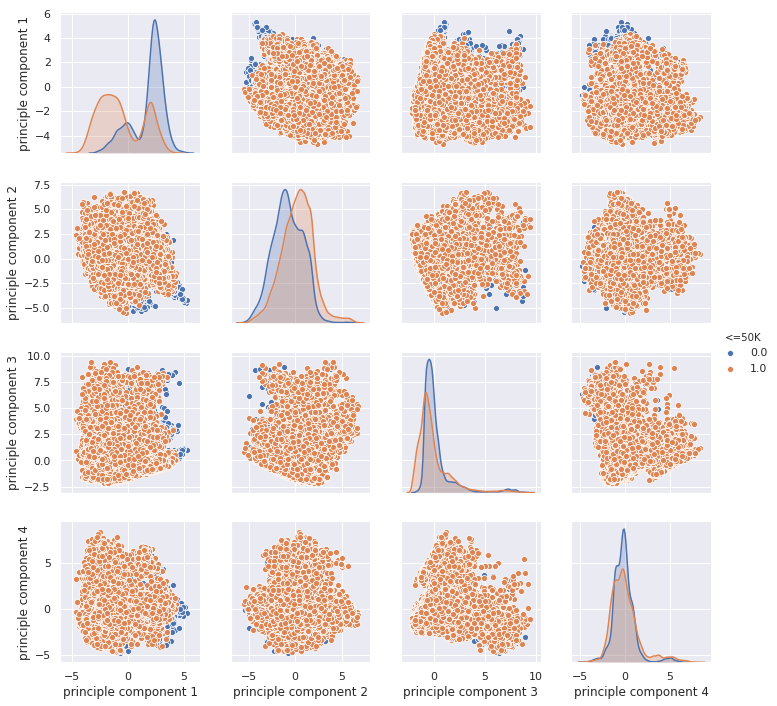

In [62]:
# plot 96 component dataframe
plt.figure()
sns.pairplot(dfs[2], vars=dfs[2].columns[:-1], hue = '<=50K')
plt.show()

It looks like there is quite a bit of overlap for each component.

# Training and Testing

We will be testing and training multiple classifiers. We will compare the accuracy of, $k$-Nearest Neighbors, Decision Trees , Random Forrest, Support Vector Machines. For each of these classifiers we will tune some parameters to increase the accuarcy of the classifer or even speed up the training and testing process. The testing will will be performed on the PCA of 96 bars.


The $k$ nearest neighbors classifier is the first classifier that the data set will be trained and tested on. There are multiple parameters that can be tweaked to optimized. A weight can be added to the classifier. The weight is off the distance of from each point in the classifier. We will be testing both a uniform weight and a weight based off of distance. The $k$ value can also be optimized for this classifier. We will be testing it from the range of 1-1000 skipping every even k. The optimized can not be even due to there being only two classes.

In [84]:
# parameters to optimize k
max_k = 75
opt_score = 0.0001
opt_k = 1

# types of weights
weights = ["uniform", 'distance']

# cross validate 5 different splits
cv = 5

For each classifier we will be taking the average accuracy of 5 different splits of cross validation.

In [85]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.model_selection import cross_val_score

# opt_score: 0.8141028470369787
# When k = 3

k_list = [101, 201, 501]
k_scores_uniform = []
k_scores_distance = []

# loop through the different types of weights
for weight in weights:

    # loop through k
    for k in k_list:

        # create classifier with k-neighbors
        knn = KNeighborsClassifier(n_neighbors=k, weights=weight)

        # store cross validation accuracy score
        scores = cross_val_score(knn, X, y, cv = cv, scoring = 'accuracy').mean()
        
        # store scores
        if weight == "uniform":
            k_scores_uniform.append(scores)
        else:
            k_scores_distance.append(scores)
        
        # check opt_score
        if opt_score < scores:
            opt_score = scores
            opt_k = k
        print(k)

print("opt_score: ", opt_score)
print("When k = ", opt_k)

101
201
501
101
201
501
opt_score:  0.8338196457208433
When k =  201


[0.8312398402967265, 0.8338196457208433, 0.8328676421490794]
[0.8312091089037198, 0.8309019270097113, 0.8309634699604759]


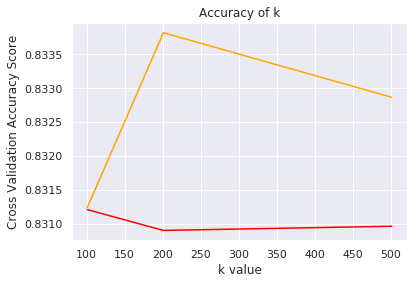

In [86]:
# plot k values
plt.figure()
plt.title('Accuracy of k')
plt.xlabel('k value')
plt.ylabel('Cross Validation Accuracy Score')
print(k_scores_distance)
print(k_scores_uniform)
plt.plot(k_list, k_scores_uniform, color="red", label="Uniform Weight")
plt.plot(k_list, k_scores_distance, color="orange", label="Distance Weight")
plt.show()

# Decision Trees

We will also be using the decision tree classifier. We will be testing the classifier with different maximum depths.

In [41]:
from sklearn import tree
from sklearn.model_selection import cross_val_score

# store scores
clf_scores = []

# optimized depth(depth, score)
opt_depth = (1, 0)

# test max_depth from 1-10
test_depth = range(1, 10)
for depth in test_depth:
    
    # create and store classifier and cross validation score
    clf = tree.DecisionTreeClassifier(max_depth = depth)
    score = cross_val_score(clf, X, y, cv = cv, scoring = 'accuracy').mean()
    clf_scores.append(score)
    
    # check for a better depth
    if opt_depth[1] <= score:
        opt_depth = (depth, score)

print(opt_depth)

(5, 0.8280767089898827)


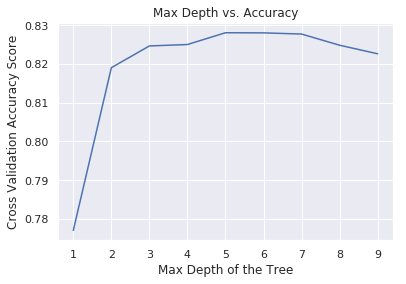

In [42]:
# plot 
plt.figure()
plt.title('Max Depth vs. Accuracy')
plt.xlabel('Max Depth of the Tree')
plt.ylabel('Cross Validation Accuracy Score')
plt.plot(test_depth, clf_scores)
plt.show()

We can vizualize the decision tree using graphiz, however, we will have to train again using the classifiers built in fit. Crossvalidation trainging and testing won't allow for Graphiz tree vizualization.

In [29]:
import graphviz

# create classifier
clf = tree.DecisionTreeClassifier()

# train
clf = clf.fit(X, y)

# plot
dot_data = tree.export_graphviz(clf, out_file=None) 
graph = graphviz.Source(dot_data) 
graph

# Random Tree

Similar to the decision tree classifier we will be testing the max depth of the tree.

In [43]:
from sklearn.ensemble import RandomForestClassifier

# store scores
rf_scores = []

# optimized depth(depth, score)
opt_depth = (9, 0)

# test max_depth from 9-20
test_depth = range(9, 20)
for depth in test_depth:

    # create and store classifier and cross validation score
    rf = RandomForestClassifier(max_depth = depth)
    score = cross_val_score(rf, X, y, cv = cv, scoring = 'accuracy').mean()    
    rf_scores.append(score)
    
    # check for a better depth
    if opt_depth[1] <= score:
        opt_depth = (depth, score)

print(opt_depth)

(13, 0.8406069735411051)


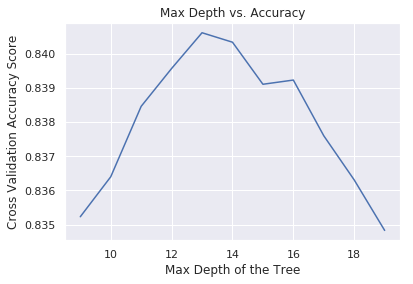

In [44]:
# plot 
plt.figure()
plt.title('Max Depth vs. Accuracy')
plt.xlabel('Max Depth of the Tree')
plt.ylabel('Cross Validation Accuracy Score')
plt.plot(test_depth, rf_scores)
plt.show()

# Support Vector Machines

There are two parameters that will be tweaked for the support vector machine classifiers, the kernel and the $C$ value. We will be testing two different states of the kernel, poly and linear. The low C implies we are allowing more outliers while a high C implies we are allowing fewer outliers.

In [22]:
from sklearn import svm
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score

from sklearn.model_selection import cross_val_score

# stores scores
lscores = []
pscores = []

# penalty
C_list = range(20, 30, 2)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)

for C in C_list:

    # linear kernel training
    svc = svm.SVC(kernel='linear', C=C)
    lsvc = svc.fit(X_train, y_train)
    y_pred = svc.predict(X_test)
    
    # lscore =cross_val_score(lsvc, X, y, cv = cv, scoring = 'accuracy').mean()
    lscores.append(accuracy_score(y_pred, y_test))

    # poly kernel training
    svc = svm.SVC(kernel='poly', C=C)
    psvc = svc.fit(X_train, y_train)
    y_pred = svc.predict(X_test)
    # pscore = cross_val_score(psvc, X, y, cv = cv, scoring = 'accuracy').mean()
    pscores.append(accuracy_score(y_pred, y_test))
    

print("linear accuracy: ", max(lscores))
print("poly accuracy: ", max(pscores))

linear accuracy:  0.8507554354501904
poly accuracy:  0.8320845105023953


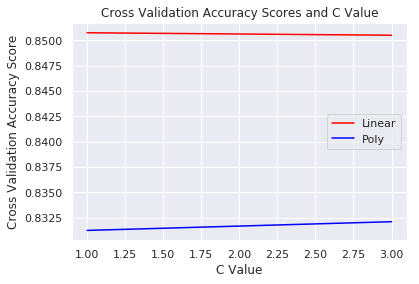

In [24]:
# plot 
plt.figure()
plt.title('Cross Validation Accuracy Scores and C Value')
plt.xlabel('C Value')
plt.ylabel('Cross Validation Accuracy Score')
plt.plot(C_list, lscores, color="red", label="Linear")
plt.plot(C_list, pscores, color="blue", label="Poly")
plt.legend()
plt.show()

# Comparing Accuracy of Classifers

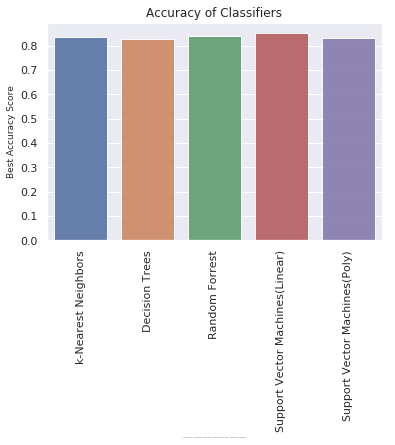

In [87]:
classifiers = ["k-Nearest Neighbors", "Decision Trees", "Random Forrest", "Support Vector Machines(Linear)", "Support Vector Machines(Poly)"]
values = [opt_score, max(clf_scores), max(rf_scores), max(lscores), max(pscores)]

# plot bar chart
sns.set(style="darkgrid")
sns.barplot(classifiers, values, alpha=0.9)
plt.title("Accuracy of Classifiers")
plt.xticks(rotation='vertical')
plt.xlabel(classifiers, fontsize=1)
plt.ylabel('Best Accuracy Score', fontsize=9)
plt.show()

The accuracy of the each classifier di not vary as much as I expected. I think the results are sucessful based on the goal of 80% accuracy. Some of the parameters can be tweaked more to add a couple percentages to the accuracy.


In future projects I most likely won't train and test with as much components. Each classifier took 30-80 min to run for a marginal increase in accuracy. Lowering the PCA will make parameter tuning faster and testing the classifiers.